# Zadanie 1

W tym ćwiczeniu prowadzimy praktyczne eksperymenty z danymi, w których liczba przypadków należących do poszczególnych klas znacznie się różni. Jest to radykalnie odmienna sytuacja od tej znanej ze zbioru danych irysków (kosaćców), gdzie klasy były idealnie zbalansowane.

- Przypomnij sobie z wykładu, jakie metody możemy zastosować żeby pomóc klasyfikatorom docenić klasy mniejszościowe, oraz jakie metryki oceny klasyfikacji są w takiej sytuacji adekwatne.
- Przejrzyj dokumentację pakietu imbalanced-learn, w szczególności zwróć uwagę na techniki nadpróbkowania, podpróbkowania oraz metryki oceny.
- Przypomnij sobie możliwości GridSearchCV do dostrajania wartości hiperparametrów. Przeanalizuj fragment kodu używający GridSearchCV w tym przykładzie.

Sposoby radzenia sobie z niezbalansowanymi klasami:
 - Nadpróbkowanie (oversampling): zwiększanie liczby przykładów klasy mniejszościowej, np. poprzez duplikację danych lub techniki takie jak SMOTE.
 - Podpróbkowanie (undersampling): redukcja liczby przykładów klasy większościowej, np. poprzez losowe usuwanie obserwacji.
 - Ważenie klas: przypisanie większych wag przykładom klasy mniejszościowej w trakcie uczenia modelu.
 - Adekwatne metryki oceny: <br>
    a) Macro-averaging: obliczanie średniej wartości metryk (np. precyzji, recallu) niezależnie dla każdej klasy, a następnie uśrednianie. <br>
    b) G-mean (geometric mean): geometryczna średnia czułości (recall) dla każdej klasy — dobrze sprawdza się przy dużej dysproporcji między klasami.

Pobierz zbiór danych o nazwie odpowiadającej Twojemu numerowi albumu. Te dane dotyczą wykrywania anomalii (zakłóceń) w sygnale audio; każdy wiersz opisuje inny fragment nagrania, a ostatnia kolumna informuje o klasie (dany fragment jest zakłócony lub nie; klasa mniejszościowa to zakłócenia). Pozostałe kolumny to różne statystyki zebrane z otoczenia danego fragmentu dźwięku; pierwszy wiersz zawiera skrótowe nazwy kolumn. Tak jak wcześniej, szczegółowy opis znaczenia atrybutów znajdziesz tutaj. Przeprowadź wstępną eksplorację zbioru: liczba i rodzaje atrybutów, ich zakresy i rozkłady wartości. Pokaż rozkłady wartości wszystkich atrybutów obok siebie na jednym szerokim wykresie pudełkowym lub skrzypcowym; na osi poziomej umieść nazwy atrybutów. Opisując wnioski (wystarczy kilka zdań) możesz pogrupować (o ile to możliwe) atrybuty pisząc np. "73 atrybuty są takie a takie, 22 atrybuty charakteryzują się tym a tym, wyjątkowy jest atrybut taki a taki", itp.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('151813-imbalanced.txt', sep='\t')
X = df.drop(columns='class')
y = df['class']
df

,dissim,el0,el1,el2,el3,el4,el5,el6,el7,el8,...,stat68,stat69,stat70,stat71,stat72,stat73,stat74,stat75,stat76,class
0,0.007303,0.444530,0.50057,0.26096,0.22849,0.14244,0.17819,0.13570,0.12851,0.101710,...,0.26199,0.205420,0.244020,0.24266,0.048627,0.025673,0.037911,0.041536,1.9108,0
1,0.007662,0.330400,0.47050,0.47446,0.70592,0.64680,0.33737,0.58326,0.75909,0.572650,...,0.22999,0.112730,0.287600,0.21463,0.032096,-0.023910,0.055652,0.031434,1.9345,0
2,0.005644,0.085889,0.60974,0.59803,0.86307,0.63353,0.48218,0.83757,0.91588,0.739510,...,0.22073,0.254160,0.145920,0.23714,0.027957,0.028703,-0.013885,0.033128,1.9342,0
3,0.009343,0.106800,0.57429,0.56036,0.79826,0.59635,0.45284,0.78656,0.84407,0.685600,...,0.23065,0.410500,0.097069,0.32846,0.030480,0.138530,-0.027753,0.067647,1.6573,0
4,0.011405,0.210480,0.55704,0.53846,0.77237,0.57336,0.43552,0.75131,0.81662,0.664770,...,0.22572,0.357800,0.045441,0.31418,0.029557,0.120590,-0.034309,0.051699,1.6529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.007383,0.566120,0.30293,0.39932,0.20795,0.47894,0.88874,0.68917,0.72648,0.538960,...,0.26139,0.094684,0.167550,0.37485,0.052704,-0.045308,-0.030653,0.158890,1.4858,0
9996,0.008245,0.795950,0.43499,0.43024,0.28704,0.48502,0.72992,0.70625,0.56966,0.502140,...,0.30130,0.235200,0.187260,0.33633,0.093013,0.040880,-0.025494,0.147040,1.5612,0
9997,0.007862,0.812060,0.52483,0.59525,0.43119,0.21441,0.48449,0.32713,0.48011,0.318410,...,0.18923,0.159800,0.199350,0.21324,0.005112,-0.022063,-0.022581,0.027620,1.8062,0
9998,0.009525,0.822970,0.66193,0.77197,0.30860,0.24801,0.24117,0.18238,0.17053,0.126100,...,0.08814,0.187880,0.203260,0.14566,-0.051083,-0.026605,-0.021485,-0.034347,1.9698,0


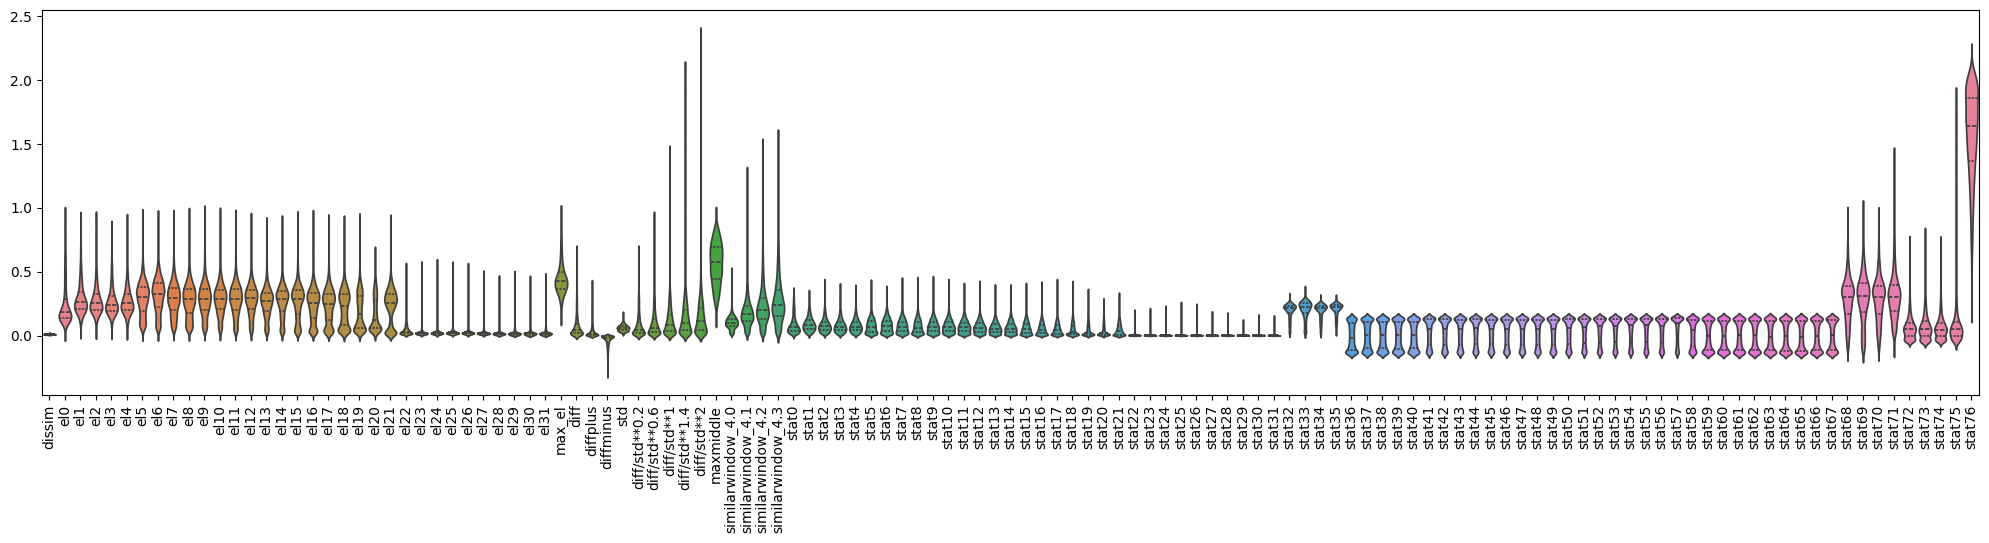

In [3]:
plt.subplots(figsize=(25, 5))
sns.violinplot(data=X, inner="quartile")
plt.xticks(rotation=90)
plt.show()

Zbiór danych zawiera 125 atrybutów o wartościach liczbowych. Atrybuty el0 – el31 oraz max_el przyjmują wartości z przedziału [0, 1], przy czym zdecydowana większość wartości skupia się blisko zera. Szczególnie wyraźnie widać to w przypadku el22 – el31. Atrybuty el0 – el21 mają nieco wyższe wartości, oscylujące wokół 0.2. Podobnie atrybuty stat0 – stat31 zawierają się w zakresie [0, 0.5], jednak większość ich wartości również znajduje się bardzo blisko zera. W przypadku stat32 – stat35 zakres wartości także mieści się w przedziale [0, 0.5], ale wartości zerowe nie występują, a najczęściej pojawiają się wartości około 0.25. Atrybuty stat36 – stat67 mają wartości rozłożone bardziej równomiernie w przedziale [-0.25, 0.25], z rozkładem symetrycznym względem zera i większą liczbą obserwacji na krańcach przedziału. Atrybuty stat68 – stat71 przyjmują wartości z przedziału [-0.25, 1.25], najczęściej około 0.4, a obserwacje przy wartościach skrajnych są rzadsze. Wartości atrybutów stat72 – stat75 w większości mieszczą się w zakresie [-0.25, 0.25], z nielicznymi wartościami odstającymi powyżej tej granicy. Atrybut stat76 cechuje się równomiernym rozkładem wartości w przedziale od 1.0 do 2.25, z jednym przypadkiem odstającym poniżej 0.75. Atrybuty diff/std oraz similarwindow mają większość wartości w zakresie [0, 0.5], z obserwacjami odstającymi powyżej tej wartości. Wyjątkowy jest atrybut dissim, którego wartości są bardzo blisko zera i praktycznie nie wykazują rozrzutu. Z kolei diffminus to jedyny atrybut przyjmujący wyłącznie wartości ujemne. Ogólnie większość atrybutów charakteryzuje się bardzo wąskim zakresem, w którym skupia się większość wartości, oraz obecnością wartości odstających poza tym zakresem.

Jaką trafność i jakie G-mean uzyskałby klasyfikator "Zero Rule"?

In [4]:
from sklearn.metrics import accuracy_score, recall_score

class_counts = df['class'].value_counts()
majority_class = class_counts.idxmax()

y_pred = [majority_class] * len(df)
y_true = df['class']

accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred, pos_label=1)
specificity = recall_score(y_true, y_pred, pos_label=0)
gmean = np.sqrt(sensitivity * specificity)

print(f"Accuracy (ZeroR): {accuracy:.4f}")
print(f"G-mean (ZeroR): {gmean:.4f}")

Accuracy (ZeroR): 0.9705
G-mean (ZeroR): 0.0000


# Zadanie 2

Stosując wiedzę nabytą na poprzednim laboratorium z transformacji przestrzeni atrybutów, zwizualizuj ten zbiór w 2D i 3D podając procent wariancji zachowany przy rzutowaniu oryginalnej przestrzeni do 2D i 3D. Na wykresach pokaż przypadki obu klas jako kropki o dwóch różnych kolorach. Rozwiąż ewentualny problem zasłaniania kropek, na czym może cierpieć mniej liczna klasa – wymyśl 2-3 odmienne sposoby poradzenia sobie z tym problemem i zastosuj te, które uznasz za skuteczne. Czy na podstawie tej wizualizacji można wnioskować o tym, dla których z poznanych metod klasyfikacji te dane będą trudne, czy nie można, i dlaczego?

In [5]:
from sklearn.decomposition import PCA

Zachowana wariancja w 2D: 0.4293


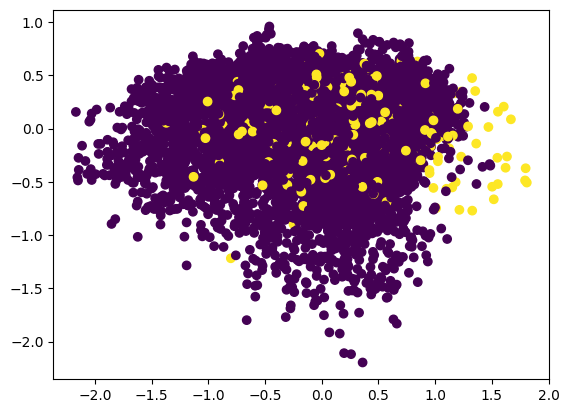

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"Zachowana wariancja w 2D: {np.sum(pca.explained_variance_ratio_):.4f}")
plt.scatter(*X_pca.T, c=y)

Zachowana wariancja w 3D: 0.4993


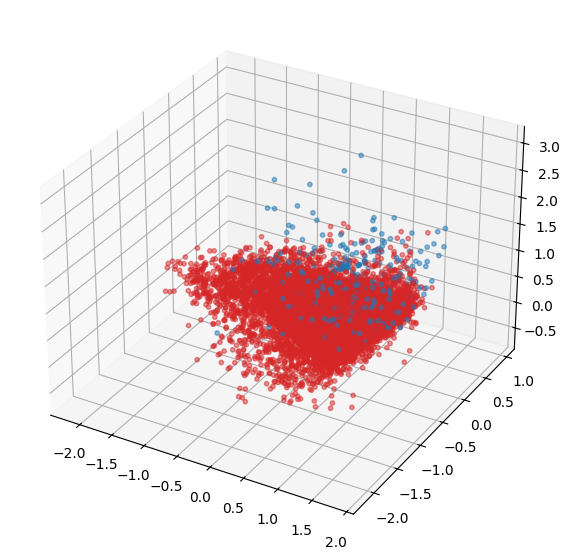

In [7]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)
print(f"Zachowana wariancja w 3D: {np.sum(pca_3d.explained_variance_ratio_):.4f}")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['tab:red' if label == 0 else 'tab:blue' for label in y]

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=colors, alpha=0.5, s=10)
plt.show()


W celu transformacji przestrzeni atrybutów zastosowano algorytm PCA. Rzutowanie oryginalnej przestrzeni na 2D pozwoliło zachować 42,93% wariancji danych, natomiast rzutowanie na 3D – 49,93%.

Przypadki obu klas przedstawiono na wykresach. Ze względu na częściowe nakładanie się klas i brak ich liniowej separowalności, klasyfikatory liniowe oraz SVC z liniowym jądrem mogą mieć trudności w skutecznym rozróżnianiu przykładów. W takiej sytuacji lepiej sprawdzą się modele nieliniowe, takie jak drzewa decyzyjne, sieci neuronowe lub algorytmy boostingowe, np. gradient boosting.

# Zadanie 3

Przejrzyj dokumentację KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, MLPClassifier, GaussianNB i QuadraticDiscriminantAnalysis – które z nich mają parametr class_weight? Czy te, które mają ten parametr, pozwalają ustawić wartość 'balanced'?

Parametr class_weight dostępny jest w klasyfikatorach: DecisionTreeClassifier, RandomForestClassifier oraz SVC. Nie występuje on w klasach: KNeighborsClassifier, MLPClassifier, GaussianNB oraz QuadraticDiscriminantAnalysis.

W przypadku klasyfikatorów posiadających ten parametr, możliwe jest ustawienie wartości balanced, co pozwala automatycznie uwzględnić nierównowagę klas poprzez dostosowanie wag odwrotnie proporcjonalnie do ich częstości w zbiorze danych.

# Zadanie 4

Postaraj się uzyskać na swoim zbiorze danych jak najwyższą trafność klasyfikacji wyżej wymienionymi klasyfikatorami używając oryginalnych (niezmienionych) atrybutów i domyślnych wartości parametrów, używając jedynie dowolnych technik przeciwdziałających problemom niezrównoważenia klas. Możesz wraz z tymi klasyfikatorami wykorzystać dowolne z metod pakietu imbalanced-learn; przetestuj przynajmniej jedną z nich żeby zobaczyć, czy przyniesie jakościową różnicę. Opisz dokładnie przeprowadzone próby i sposób, w jaki mierzysz jakość. Wyznaczaj wartości trzech metryk: tradycyjną trafność, G-mean oraz ROC AUC. W rozdziale 3.4.3.3 przeczytasz, jak uzyskać wartości dwóch (lub więcej) metryk, np. podczas uruchomienia GridSearchCV. Użyj 10-fold stratified CV.  Pokaż wszystkie uzyskane wyniki na jednym wykresie; nanieś na nim odchylenia standardowe z CV żeby widzieć, na ile istotne są różnice. Odnieś uzyskane najlepsze wyniki w trzech kategoriach do wyników, jakie uzyskałby w każdej kategorii klasyfikator ZeroRule.

In [8]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message=".*covariance matrix of class.*")

In [9]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

classes = [KNeighborsClassifier, RandomForestClassifier, SVC,
           MLPClassifier, GaussianNB, QuadraticDiscriminantAnalysis]

sampling_methods = {
    "original": None,
    "undersample": ClusterCentroids(random_state=42),
    "oversample": SMOTE(random_state=42)
}

fold = StratifiedKFold(n_splits=10, shuffle=True)
resNotScaled = []

for cls in classes:
    for sampling_name, sampler in sampling_methods.items():
        for tr_idx, te_idx in fold.split(X, y):
            X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
            y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]

            if sampler is not None:
                X_tr, y_tr = sampler.fit_resample(X_tr, y_tr)

            model = cls()
            model.fit(X_tr, y_tr)
            Y_te = model.predict(X_te)

            try:
                roc = roc_auc_score(y_te, Y_te)
            except ValueError:
                roc = np.nan

            resNotScaled.append(dict(
                method=f"{cls.__name__} {sampling_name}",
                acc=accuracy_score(y_te, Y_te),
                gmean=geometric_mean_score(y_te, Y_te),
                rocauc=roc
            ))

resNotScaled = pd.DataFrame(resNotScaled)


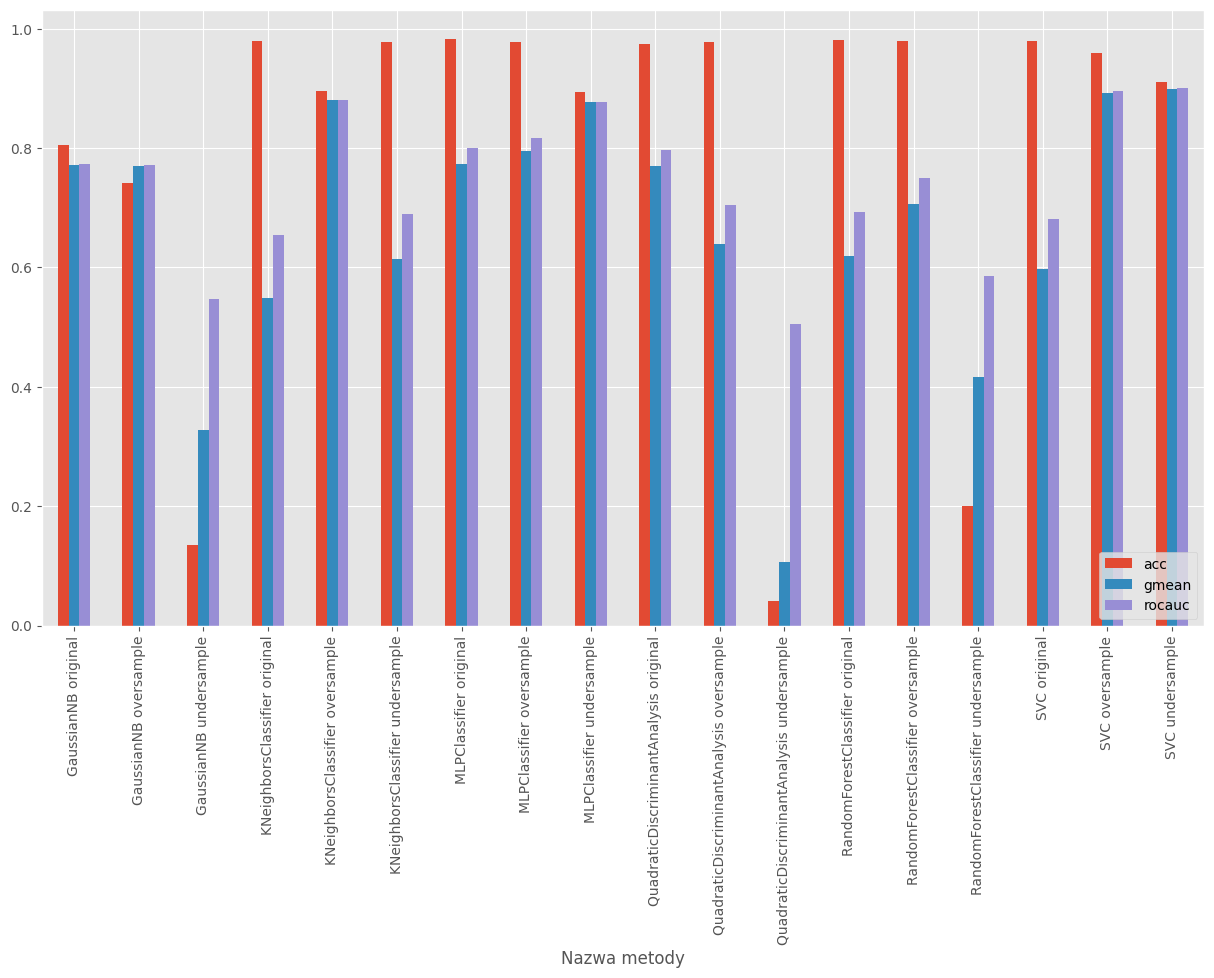

In [10]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
resNotScaled.groupby('method').mean().plot.bar(ax=ax)
plt.xlabel("Nazwa metody")
plt.legend(loc='lower right')

W eksperymencie zastosowano sześć klasyfikatorów: KNeighborsClassifier, RandomForestClassifier, SVC, MLPClassifier, GaussianNB oraz QuadraticDiscriminantAnalysis. Wszystkie modele uruchomiono z domyślnymi parametrami.

W celu oceny jakości działania klasyfikatorów wykorzystano 10-krotną walidację krzyżową z zachowaniem proporcji klas (StratifiedKFold). Dla każdego podziału trenowano model i dokonywano predykcji na danych testowych. W ramach eksperymentu uwzględniono trzy warianty danych: oryginalny, z podpróbkowaniem (ClusterCentroids) oraz z nadpróbkowaniem (SMOTE).

Dla każdej kombinacji klasyfikatora i wariantu danych obliczono trzy metryki: dokładność (accuracy), średnią geometryczną (geometric mean) oraz pole pod krzywą ROC (ROC AUC).

Wyniki wykazały, że dla danych oryginalnych osiągnięto bardzo wysoką dokładność (ponad 0.95 dla większości klasyfikatorów), natomiast metryki G-mean i ROC AUC miały niższe wartości (0.6–0.8), co sugeruje problem niezrównoważenia klas. Zarówno podpróbkowanie, jak i nadpróbkowanie przyczyniły się do wyrównania wartości metryk. Lepsze wyniki uzyskano dla nadpróbkowania – w przypadku klasyfikatorów RandomForest, SVC, MLP oraz KNN metryki zwiększyły się średnio o około 0.1.

Ostateczna dokładność klasyfikatorów była zbliżona do klasyfikatora ZeroRule (0.9705), jednak zarówno wartości G-mean, jak i ROC AUC były istotnie wyższe od odpowiednio 0 (dla G-mean) i 0.5 (dla ROC AUC), uzyskanych przez ZeroRule.

# Zadanie 5

Powtórz cały poprzedni eksperyment (poszukiwanie najwyższej jakości) jeszcze raz, aby porównać (np. wykresy różnic) wyniki wykorzystania oryginalnych atrybutów oraz atrybutów znormalizowanych. Wybierz jedną metodę normalizacji, opcjonalnie możesz wypróbować też PowerTransformer. Zwróć uwagę, jak należy podejść do skalowania, kiedy mamy zbiór uczący i testujący, i nie wolno nam "dotykać" zbioru testowego podczas uczenia.

Opisz i zinterpretuj rezultaty. Jak mają się uzyskane wyniki do zalecenia (lub braku zalecenia) normalizacji dla poszczególnych klasyfikatorów?

In [11]:
from sklearn.preprocessing import StandardScaler

classes = [KNeighborsClassifier, RandomForestClassifier, SVC,
           MLPClassifier, GaussianNB, QuadraticDiscriminantAnalysis]

sampling_methods = {
    "original": None,
    "undersample": ClusterCentroids(random_state=42),
    "oversample": SMOTE(random_state=42)
}

fold = StratifiedKFold(n_splits=10, shuffle=True)
resScaled = []

for cls in classes:
    for sampling_name, sampler in sampling_methods.items():
        for tr_idx, te_idx in fold.split(X, y):
            X_tr, X_te = X.loc[tr_idx], X.loc[te_idx]
            y_tr, y_te = y.loc[tr_idx], y.loc[te_idx]
            
            scaler = StandardScaler()
            X_tr = scaler.fit_transform(X_tr)
            X_te = scaler.transform(X_te)

            if sampler is not None:
                X_tr, y_tr = sampler.fit_resample(X_tr, y_tr)
            
            model = cls()
            model.fit(X_tr, y_tr)
            Y_te = model.predict(X_te)

            try:
                roc = roc_auc_score(y_te, Y_te)
            except ValueError:
                roc = np.nan

            resScaled.append(dict(
                method=f"{cls.__name__} {sampling_name}",
                acc=accuracy_score(y_te, Y_te),
                gmean=geometric_mean_score(y_te, Y_te),
                rocauc=roc
            ))

resScaled = pd.DataFrame(resScaled)


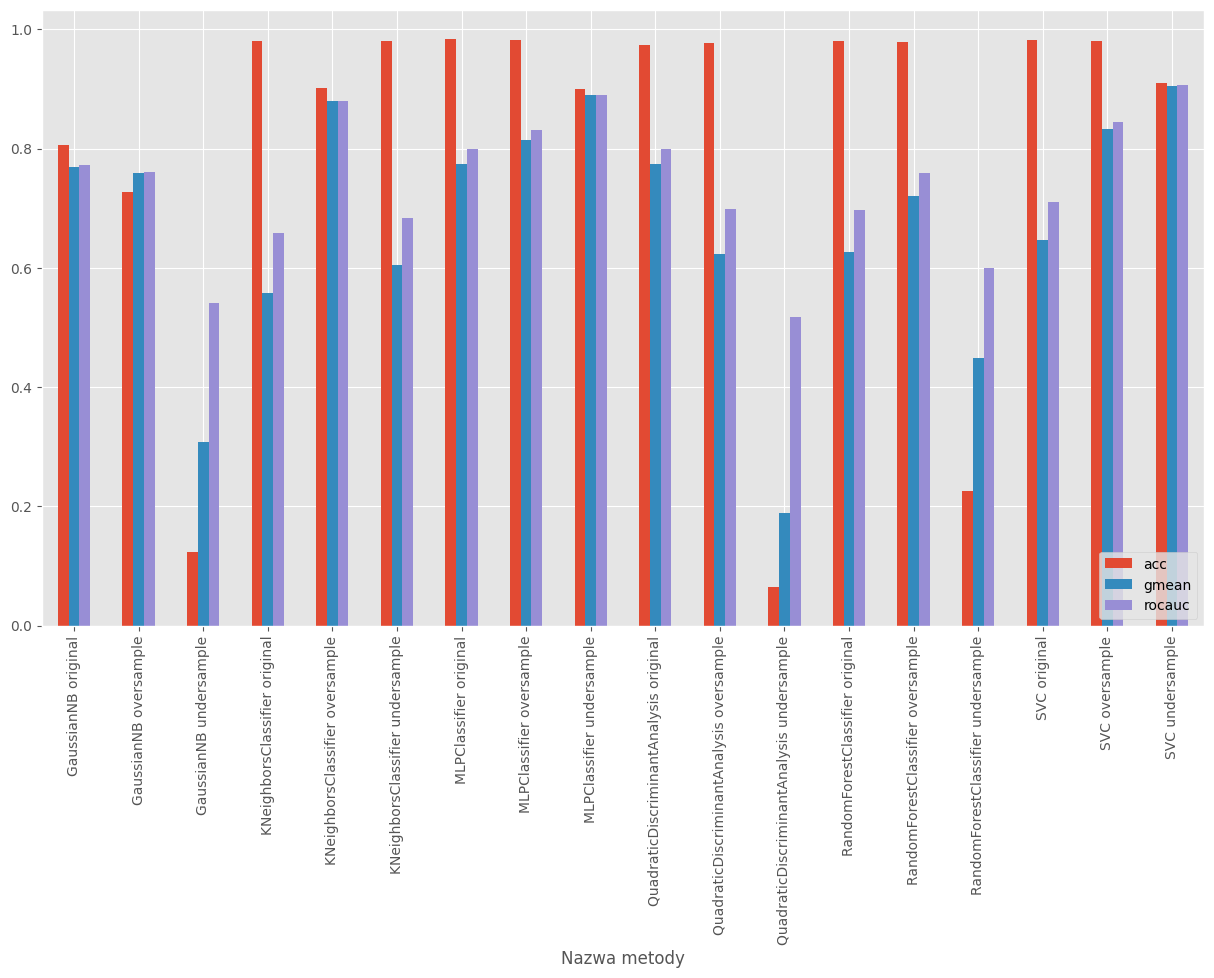

In [12]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
resScaled.groupby('method').mean().plot.bar(ax=ax)
plt.xlabel("Nazwa metody")
plt.legend(loc='lower right')

Różnice między danymi znormalizowanymi, a tymi przed normalizacją:

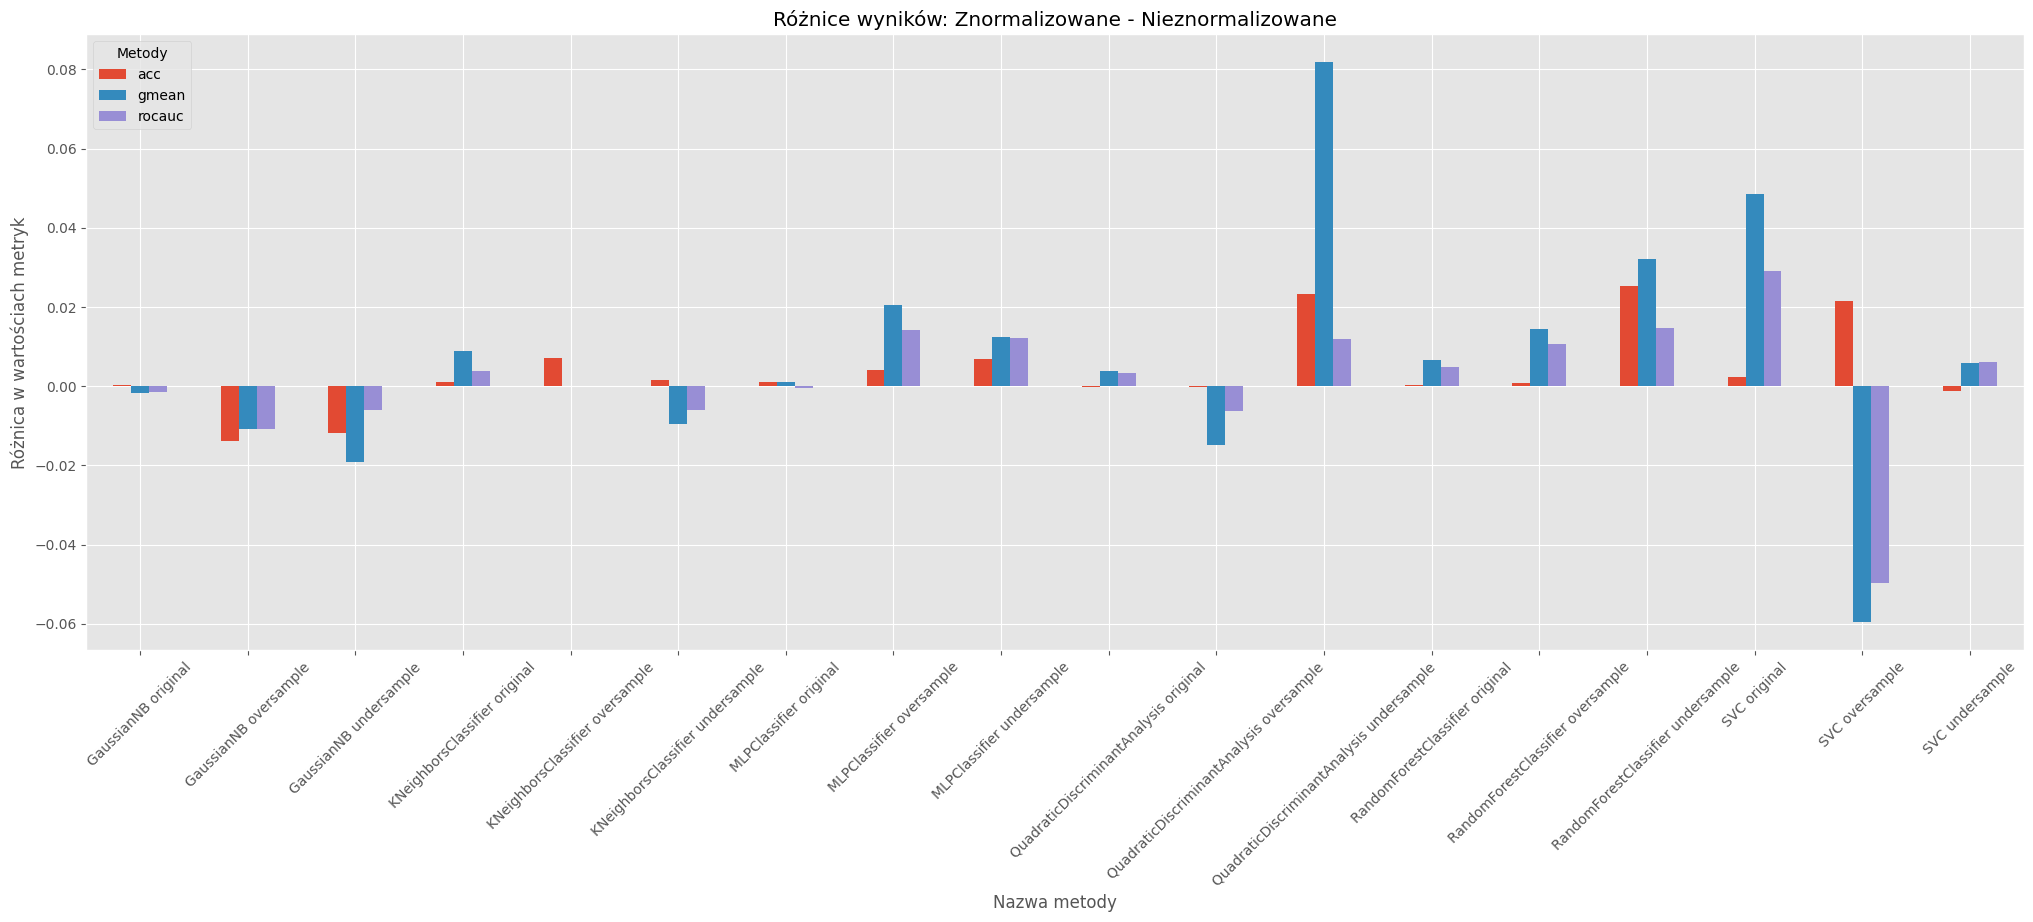

In [13]:
resNotScaled_mean = resNotScaled.groupby('method').mean()
resScaled_mean = resScaled.groupby('method').mean()

diff = resScaled_mean - resNotScaled_mean

diff.plot.bar(figsize=(25, 8))
plt.title("Różnice wyników: Znormalizowane - Nieznormalizowane")
plt.xlabel("Nazwa metody")
plt.ylabel("Różnica w wartościach metryk")
plt.legend(title="Metody", loc='upper left')
plt.xticks(rotation=45)
plt.show()


Do normalizacji danych zastosowano pipeline składający się ze standardowego skalera oraz klasyfikatora. Na wykresie przedstawiono różnice pomiędzy wartościami metryk uzyskanymi w poprzednim eksperymencie (bez normalizacji) a wynikami po zastosowaniu normalizacji.

Dla klasyfikatorów KNN oraz GaussianNB nie zaobserwowano istotnych zmian. Wynik ten może być zaskakujący, szczególnie w przypadku KNN, który zwykle wymaga normalizacji ze względu na wrażliwość na skalę atrybutów. W przypadku GaussianNB oczekiwano wpływu normalizacji na rozkłady zmiennych, jednak w praktyce nie wpłynęło to znacząco na wyniki.

Z kolei dla klasyfikatorów MLP oraz QDA odnotowano zauważalną poprawę metryk (ok. +0.02), co potwierdza znane zalecenia, że te modele często zyskują na przeskalowaniu danych. W przypadku Random Forest, który z natury nie wymaga normalizacji, również zaobserwowano niewielką poprawę wyników — szczególnie w scenariuszu z podpróbkowaniem.

Interesującym przypadkiem jest SVC, który przy nadpróbkowaniu wykazał pogorszenie wyników w metrykach G-mean oraz ROC AUC, co sugeruje możliwą interakcję pomiędzy metodą oversamplingu a procesem skalowania.

# Zadanie 6

Wybierz najbardziej obiecujący, jeden klasyfikator i dostrój jego parametry używając metryki odpowiedniej dla niezbalansowanych klas. Przedstaw wyniki – najlepiej graficznie, np. za pomocą zestawu heatmap dla par zmieniających się parametrów (przekrojów przez 3D lub 4D – zależnie od tego, ile hiperparametrów optymalizujesz używając GridSearchCV). Ile wynosi zysk z dostrojenia w porównaniu do domyślnych wartości parametrów?

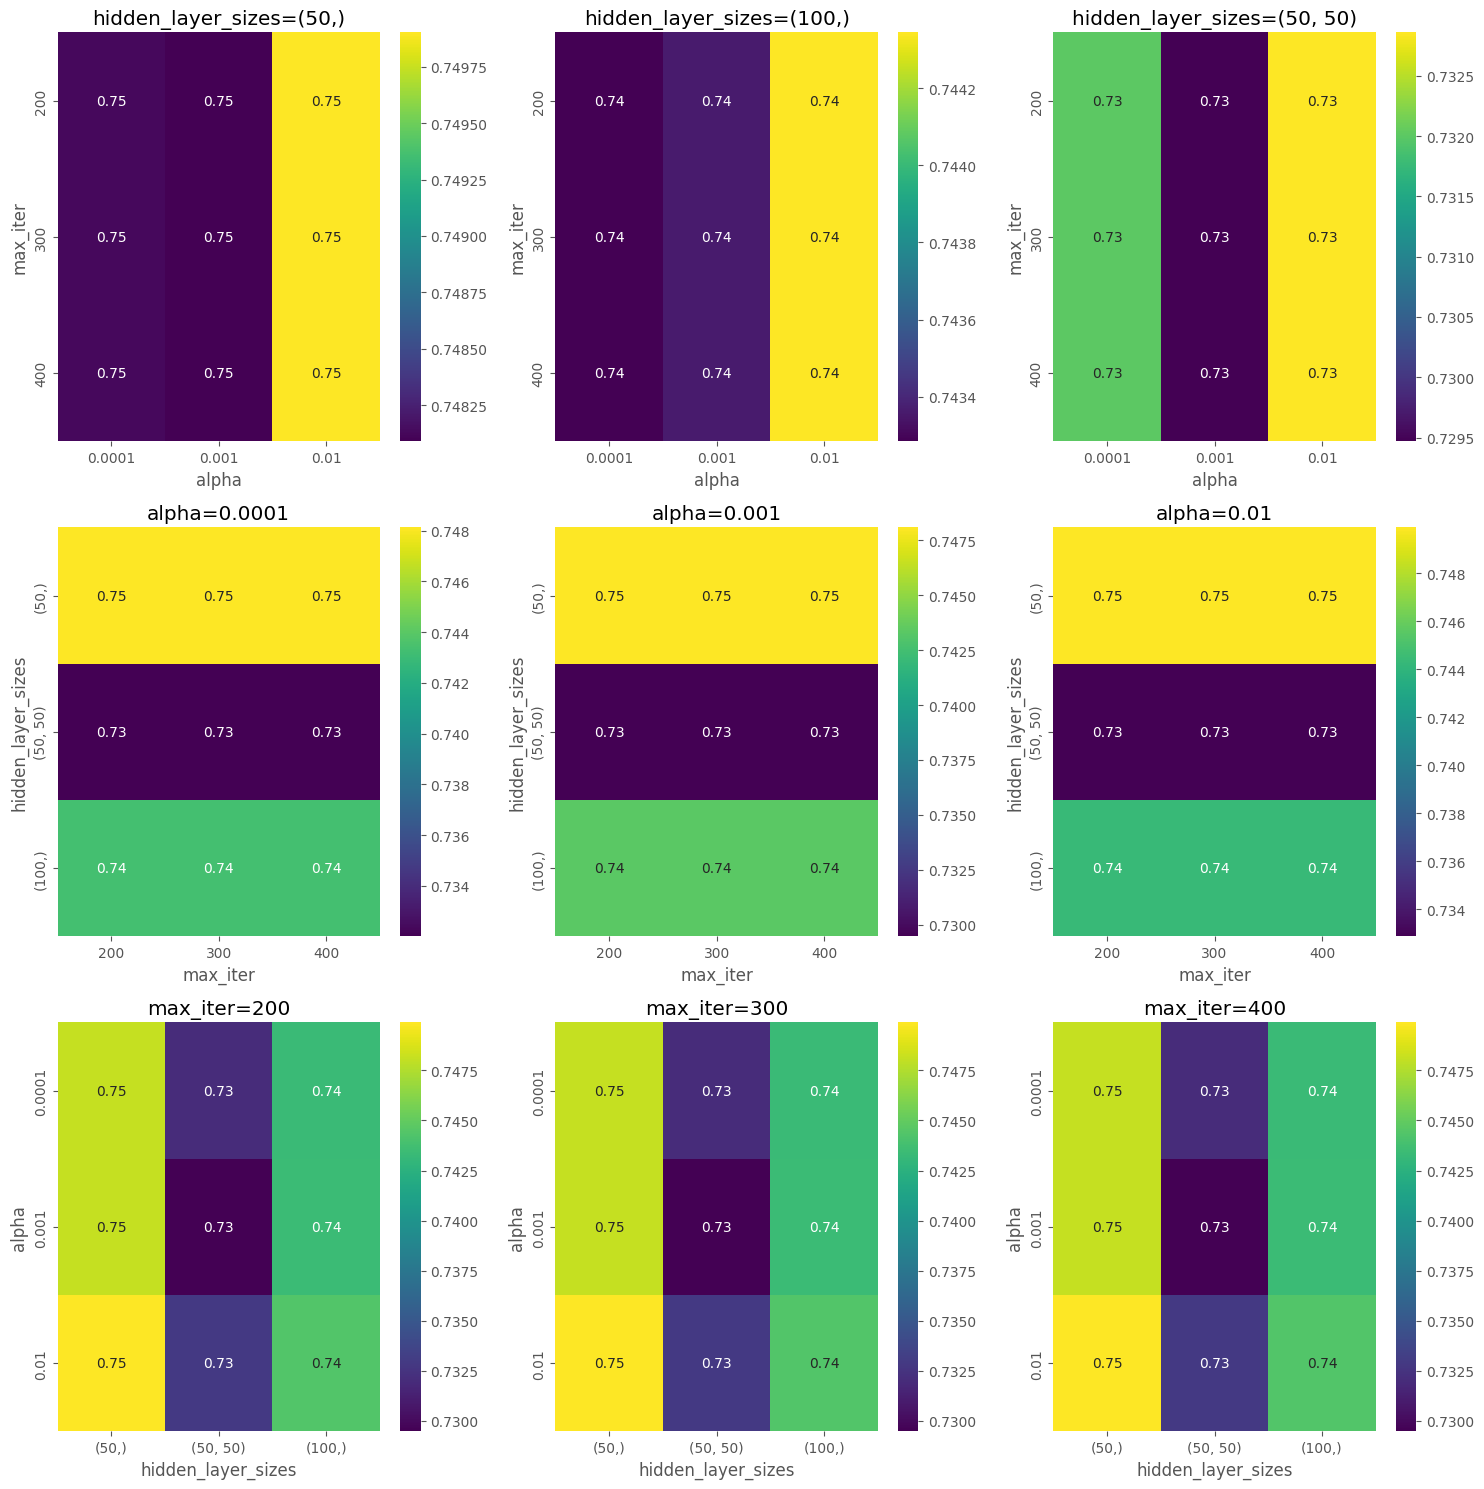

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
results = []
scores = []

X_original = X.copy()
y_original = y.copy()

for tr_idx, te_idx in fold.split(X_original, y_original):
    if hasattr(X_original, 'loc'):
        X_tr, X_te = X_original.loc[tr_idx], X_original.loc[te_idx]
        y_tr, y_te = y_original.loc[tr_idx], y_original.loc[te_idx]
    else:
        X_tr, X_te = X_original[tr_idx], X_original[te_idx]
        y_tr, y_te = y_original[tr_idx], y_original[te_idx]

    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)

    model = MLPClassifier(random_state=42)
    grid_search = GridSearchCV(
        model,
        param_grid=param_grid,
        cv=3,
        scoring=make_scorer(roc_auc_score),
        n_jobs=-1
    )

    res = grid_search.fit(X_tr, y_tr)
    Y_te = res.predict(X_te)

    results.append(res)
    scores.append({
        'rocauc': roc_auc_score(y_te, Y_te),
        'best_params': res.best_params_
    })

plot_data = []
for res in results:
    for i, combination in enumerate(res.cv_results_['params']):
        plot_data.append({
            'hidden_layer_sizes': combination['hidden_layer_sizes'],
            'alpha': combination['alpha'],
            'max_iter': combination['max_iter'],
            'roc_auc': res.cv_results_['mean_test_score'][i],
        })
plot_df = pd.DataFrame(plot_data)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
params = ['hidden_layer_sizes', 'alpha', 'max_iter']
param_values = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

for i, fixed_param in enumerate(params):
    for j, fixed_value in enumerate(param_values[fixed_param]):
        ax = axes[i, j]
        data = plot_df[plot_df[fixed_param] == fixed_value]
        x_param = params[(i + 1) % 3]
        y_param = params[(i + 2) % 3]
        pivot_table = data.pivot_table(index=y_param, columns=x_param, values='roc_auc')
        sns.heatmap(pivot_table, annot=True, cmap='viridis', ax=ax)
        ax.set_title(f'{fixed_param}={fixed_value}')
        ax.set_xlabel(x_param)
        ax.set_ylabel(y_param)

plt.tight_layout()
plt.show()

Do eksperymentu wybrano klasyfikator MLP, który wcześniej osiągał dobre wyniki. Jako metrykę do strojenia parametrów zastosowano wskaźnik ROC AUC. Przeprowadzono optymalizację trzech parametrów: hidden_layer_sizes, alpha oraz max_iter.

Wyniki przedstawiono na załączonych heatmapach. Dla wszystkich kombinacji parametrów uzyskano wynik na poziomie około 0.75. Największy wpływ na jakość klasyfikacji miał parametr hidden_layer_sizes, dla którego zaobserwowano największe różnice pomiędzy wartościami minimalnymi i maksymalnymi.

Nie zaobserwowano poprawy względem wyniku uzyskanego przy domyślnych ustawieniach.

# Zadanie 7

Które z atrybutów (ich nazwy są w pierwszym wierszu pliku danych) są najistotniejsze w klasyfikacji i jakie są różnice w ich istotności? Żeby odpowiedzieć na to pytanie, możesz użyć dowolnej z technik i algorytmów poznanych do tej pory na wykładzie i laboratorium oraz dowolnej biblioteki.

Zostaw sobie na przyszłość komentarze w kodzie; wykorzystywany tu model i dane będą jeszcze używane na ostatnich zajęciach.

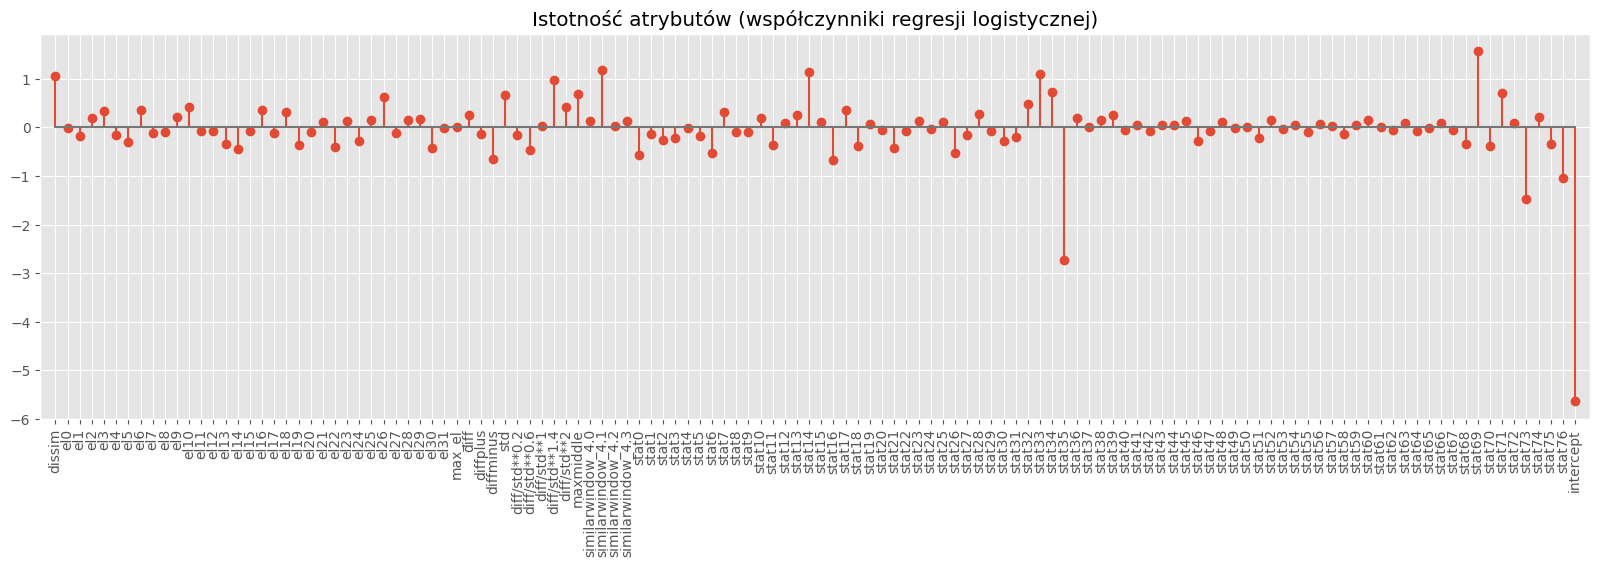

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_tr = scaler.fit_transform(X)

logreg = LogisticRegression(penalty='l2', solver='liblinear')  # lub 'saga' dla dużych zbiorów
logreg.fit(X_tr, y)

plt.figure(figsize=(20, 5))
plt.stem(list(df.columns[:-1]) + ['intercept'], list(logreg.coef_[0]) + [logreg.intercept_[0]])
plt.xticks(rotation=90)
plt.margins(x=0.01)
plt.title("Istotność atrybutów (współczynniki regresji logistycznej)")
plt.grid(True)
plt.show()


W celu identyfikacji najbardziej wpływowych atrybutów zastosowano regresję logistyczną i wyznaczono współczynniki modelu. Najwyższe wartości uzyskały atrybuty stat35 oraz stat73, wskazując na ich istotny wpływ na klasyfikację. Znaczące znaczenie miały również: dissim, stat69, stat76, stat14 oraz similarwindow_4.1.

# Zadanie 8

Wybierz klasyfikator, który ma parametr class_weight, i przetestuj jego działanie dla pięciu bardzo różnych wartości tego parametru, włączając w to równe wagi klas, wagi odpowiadające działaniu balanced, oraz wagi kładące nacisk na klasę mniejszościową. Dla każdej z tych pięciu prób wyświetlaj macierz pomyłek (ze zbioru testowego uzyskanego dowolnym sposobem podziału). Czy widzisz wpływ class_weight w macierzach pomyłek? Możesz zrobić np. wykres: na osi poziomej proporcja wag, na pionowej – liczby false positive i false negative.

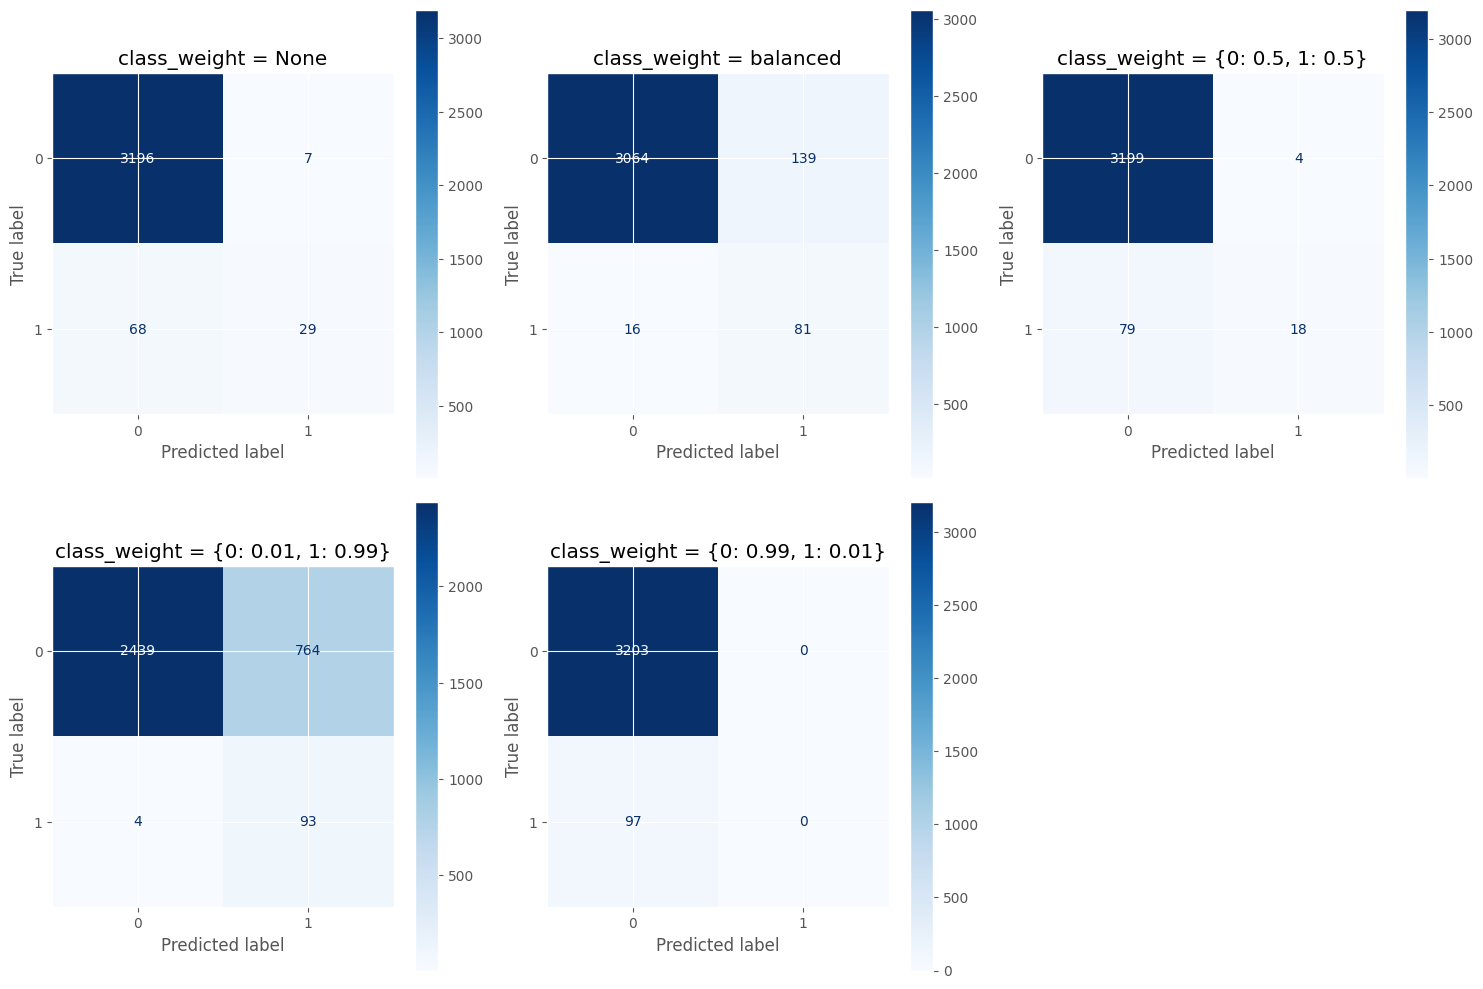

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

class_weights = [None, 'balanced', {0: 0.5, 1: 0.5}, {0: 0.01, 1: 0.99}, {0: 0.99, 1: 0.01}]
cms = []
plt.figure(figsize=(15, 10))

for i, w in enumerate(class_weights):
    model = SVC(class_weight=w, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    cm = confusion_matrix(y_te, y_pred)
    cms.append(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, )
    disp.plot(ax=plt.subplot(2, 3, i + 1), cmap='Blues')
    plt.title(f'class_weight = {w}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plt.tight_layout()
plt.show()


W eksperymencie wykorzystano klasyfikator SVM (Support Vector Classifier). Zbiór testowy został wydzielony za pomocą funkcji train_test_split, bez wcześniejszej normalizacji danych. Przetestowano pięć różnych ustawień parametru class_weight: brak wag (domyślnie), wagi zrównujące częstości klas (balanced), równe wagi dla obu klas, zwiększony nacisk na klasę mniejszościową oraz zwiększony nacisk na klasę większościową. Dla każdego przypadku wyznaczono macierz pomyłek, co pozwala na ocenę wpływu wartości parametru class_weight na wyniki klasyfikacji.

# Zadanie 9

Obejrzyj macierze pomyłek dla najlepszych uzyskanych klasyfikatorów i podsumuj wnioski: jaki był wpływ normalizacji? Jakie klasyfikatory i ich parametry dały najlepszą jakość klasyfikowania? Czy klasyfikatory umożliwiające podawanie wag klas dały lepsze wyniki na Twoim zbiorze? Wybierz najlepszy klasyfikator dla każdej z trzech metryk jakości i podaj dla niego wszystkie trzy wartości metryk; czy zwycięzcy w każdej kategorii są bardzo dobrzy także w pozostałych kategoriach? Jak duże są odchylenia standardowe wartości zwracanych przez 10-fold stratified CV i czy różnice w jakościach omawianych klasyfikatorów są istotne? (na jakiej podstawie tak uważasz?)

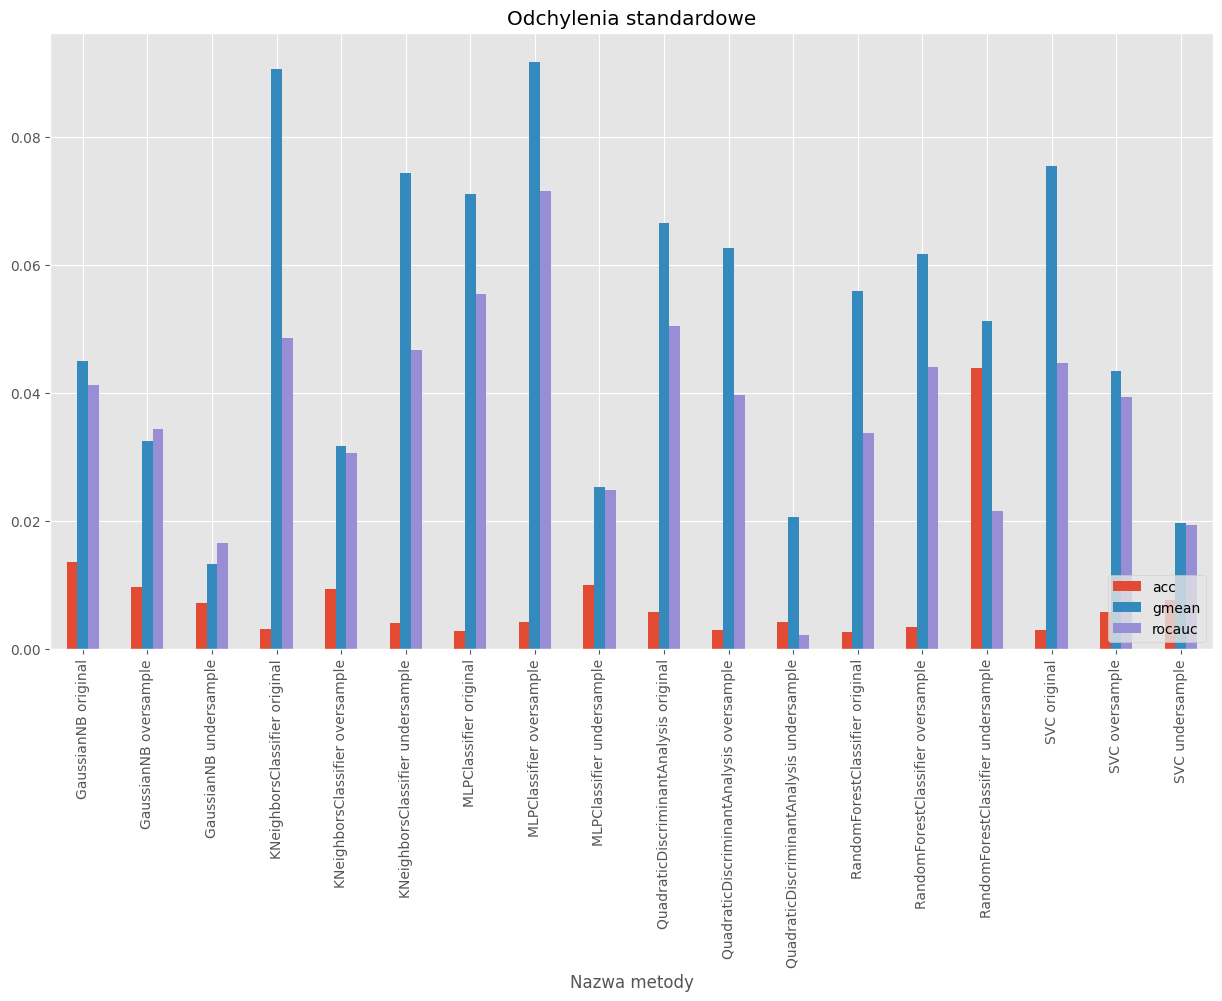

In [17]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
resNotScaled.groupby('method').std().plot.bar(ax=ax)
plt.title("Odchylenia standardowe")
plt.xlabel("Nazwa metody")
plt.legend(loc='lower right')

Przeprowadzono analizę wyników klasyfikacji uzyskanych dla różnych modeli. Wpływ normalizacji danych okazał się nieznaczny i nie wpłynął istotnie na jakość predykcji.

Najwyższą wartość metryki accuracy osiągnięto dla klasyfikatora KNN (około 0.96), jednak wynik ten nie przełożył się na wysokie wartości pozostałych metryk, takich jak precision czy recall.

Pod względem metryk g-mean oraz ROC AUC najlepsze rezultaty uzyskano przy użyciu klasyfikatora SVC z zastosowanym undersamplingiem, osiągając wartości zbliżone do 0.89.

Odchylenia standardowe wyników uzyskanych w 10-krotnej stratyfikowanej walidacji krzyżowej były niewielkie (w zakresie 0.01–0.03), co potwierdza stabilność działania klasyfikatorów. Tak niskie wartości odchyleń sugerują, że zaobserwowane różnice pomiędzy modelami mogą być istotne statystycznie, zwłaszcza gdy przewyższają poziom tych odchyleń.